In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#load data from csv file
def load_Stroke_data():
    return pd.read_csv("healthcare-dataset-stroke-data.csv")

In [2]:
stroke = load_Stroke_data()
df= pd.DataFrame(data=stroke)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df = df.drop(columns="id")

In [5]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.describe(include=["float64","int64"])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.shape

(5110, 11)

In [8]:
df.columns.values.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [10]:
mode_value = df['smoking_status'].mode()[0]
df['smoking_status'] = df['smoking_status'].replace('Unknown', mode_value)
df["smoking_status"].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [12]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
#remove noisy data
df = df[df['gender'] != 'Other']
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

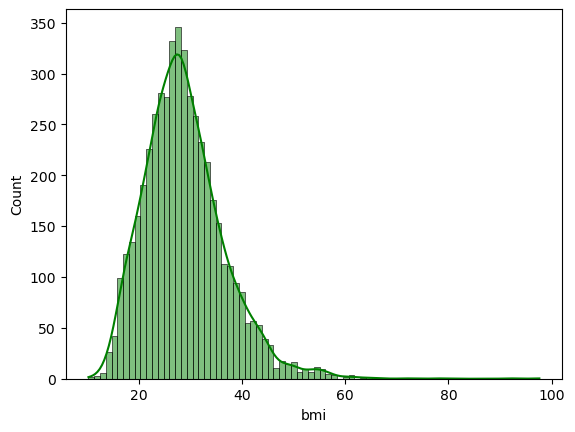

In [16]:
sns.histplot(data=df["bmi"], kde=True, color="green")
plt.show()
#positively skewed

In [17]:
# we will take the median to fill the null cells in bmi. because central tendancy is positively skewed
bmi_median = df.describe().loc['50%']['bmi']
df = df.fillna({"bmi": bmi_median})
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

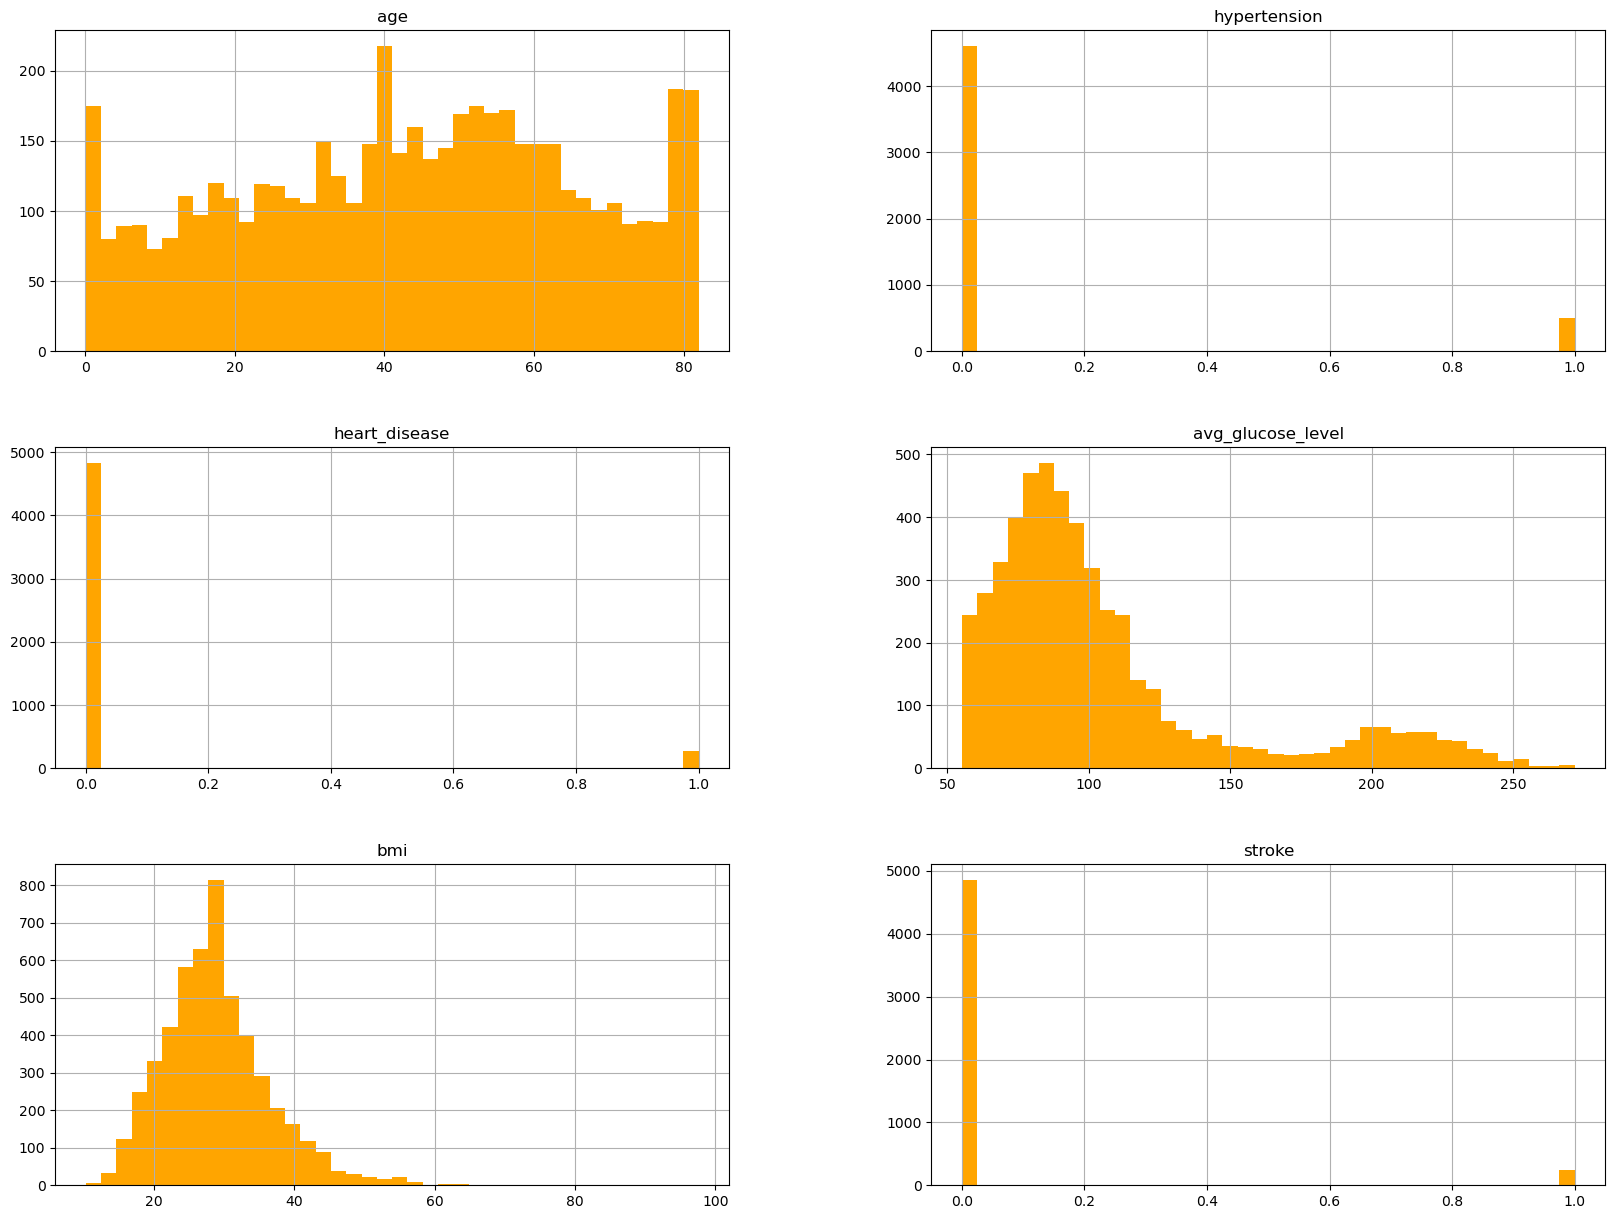

In [18]:
# a hishtogram of each feature
df.hist(bins=40, figsize=(20,15), color="orange")
plt.show()

In [19]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.324211,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.158252,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036879,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167033,0.131991
bmi,0.324211,0.158252,0.036879,0.167033,1.000000,0.036075
stroke,0.245239,0.127891,0.134905,0.131991,0.036075,1.000000


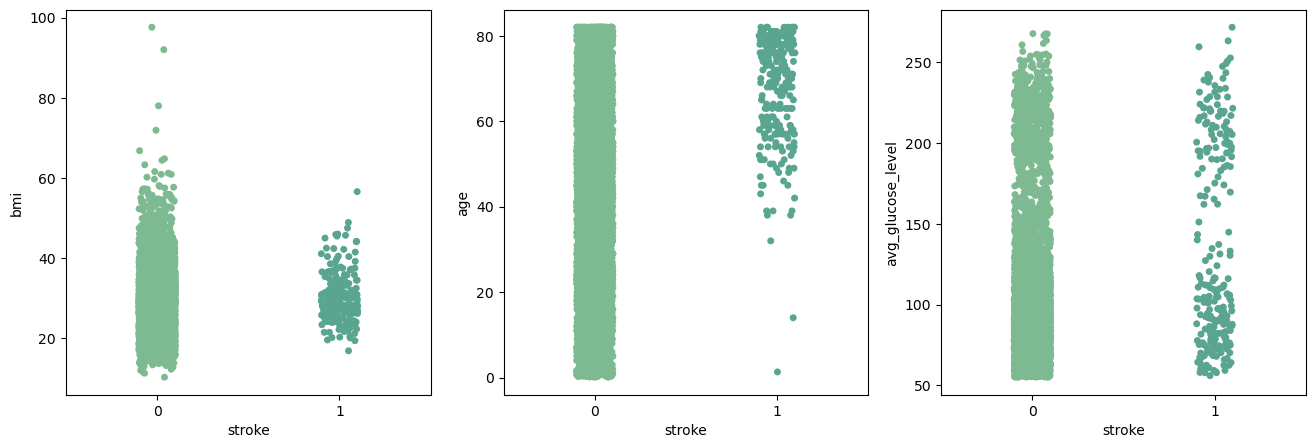

In [20]:
#scatter/strip plot
color = sns.color_palette("crest")
sns.set_palette(color)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df, x='stroke',y='bmi')
plt.subplot(1, 3,2)
sns.stripplot(data=df, x='stroke',y='age')
plt.subplot(1, 3,3)
sns.stripplot(data=df, x='stroke',y='avg_glucose_level')
plt.show()

In [21]:
#even though low and high bmi could lead to stroke, this data set shows only low bmi are more prone to have a stroke
# we can also see that people of age above 55 have a better chance of havving a storke
# low glucose level have a high chance of getting a stroke. moreover, high glucose levels have lower chance of getting a
#stroke, but not as low as if the glucose level were normal

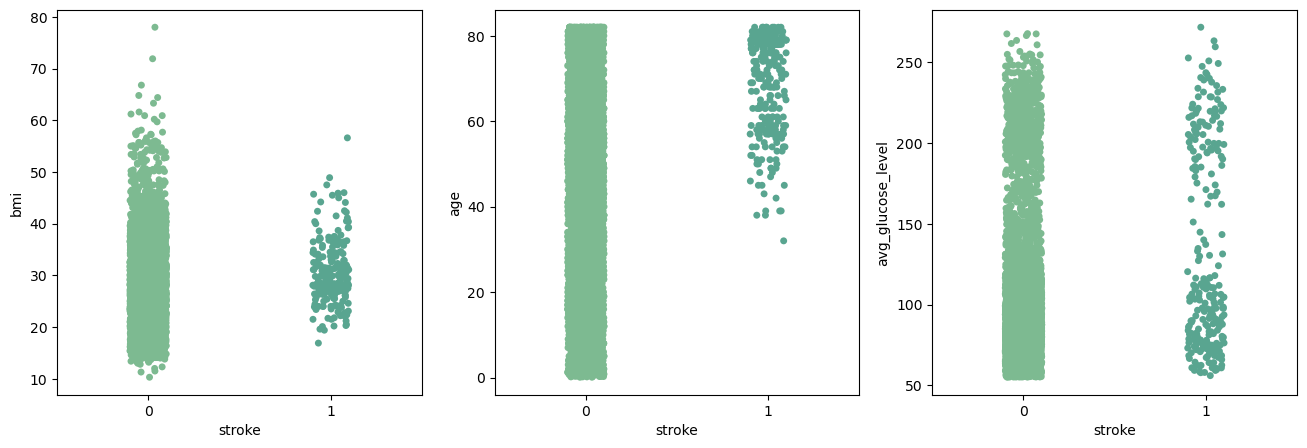

In [22]:
df = df[~((df['age'] <= 20) & (df['stroke'] == 1))]
df = df[~((df['bmi'] >= 80) & (df['stroke'] == 0))]
#scatter/strip plot
color = sns.color_palette("crest")
sns.set_palette(color)
plt.figure(figsize=(16, 5))
plt.subplot(1, 3,1)
sns.stripplot(data=df, x='stroke',y='bmi')
plt.subplot(1, 3,2)
sns.stripplot(data=df, x='stroke',y='age')
plt.subplot(1, 3,3)
sns.stripplot(data=df, x='stroke',y='avg_glucose_level')
plt.show()

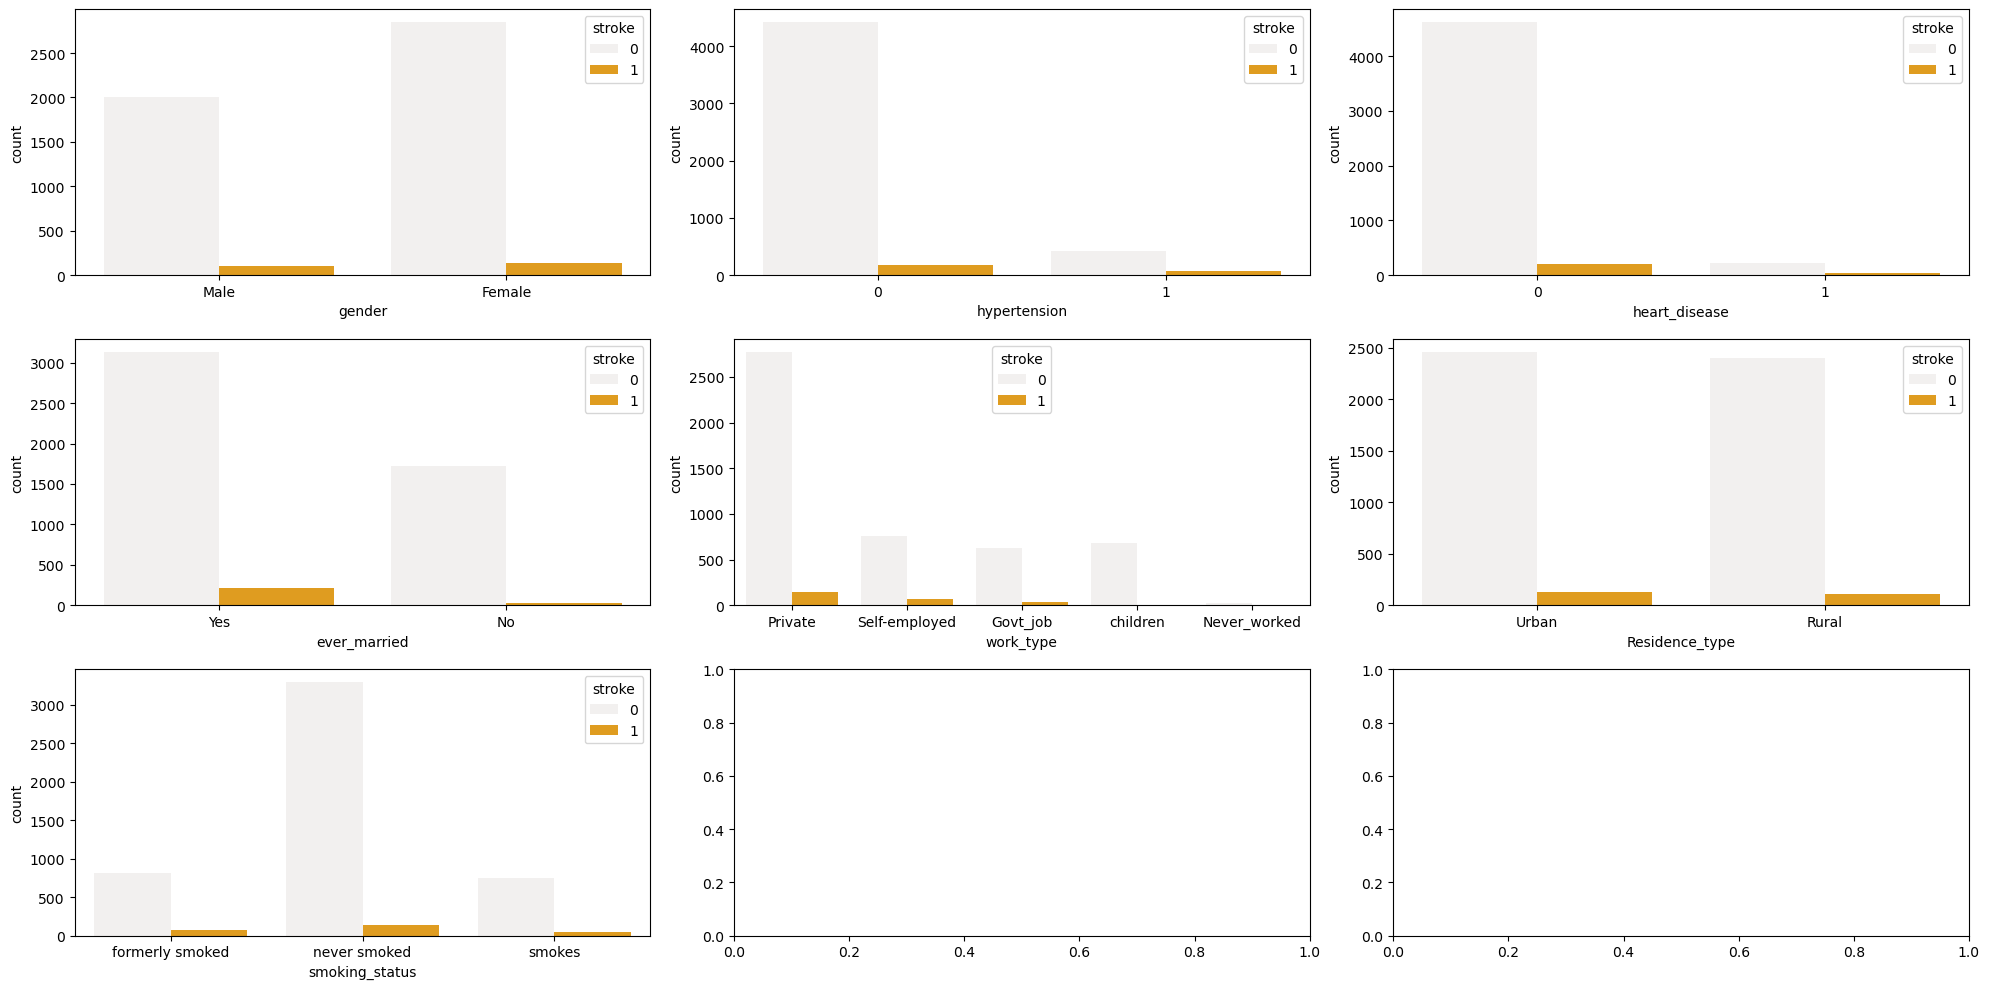

In [23]:
cat_col = df.select_dtypes(include=['object','int64']).columns.values.tolist()
fig,ax = plt.subplots(3,3,figsize=(20, 10))
sns.countplot(data=df, x=cat_col[0], hue='stroke',ax =ax[0,0],color="orange")
sns.countplot(data=df, x=cat_col[1], hue='stroke',ax =ax[0,1],color="orange")
sns.countplot(data=df, x=cat_col[2], hue='stroke',ax =ax[0,2],color="orange")
sns.countplot(data=df, x=cat_col[3], hue='stroke',ax =ax[1,0],color="orange")
sns.countplot(data=df, x=cat_col[4], hue='stroke',ax =ax[1,1],color="orange")
sns.countplot(data=df, x=cat_col[5], hue='stroke',ax =ax[1,2],color="orange")
sns.countplot(data=df, x=cat_col[6], hue='stroke',ax =ax[2,0],color="orange")
plt.tight_layout()

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

object_list = df.select_dtypes(include=['object']).columns.values.tolist()
for x in object_list:
    df[x]= label_encoder.fit_transform(df[x])


In [25]:
df["smoking_status"].value_counts()

1    3432
0     884
2     789
Name: smoking_status, dtype: int64

In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score
# features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']
# df_train = df[df['smoking_status'] != 0 ]
# #df_train = df.copy()
# df_test = df[df['smoking_status'] == 0 ]
# #df_test = df.copy()
# #X_train = df_train.drop(columns="smoking_status")
# X_train = df_train[features]
# y_train = df_train['smoking_status']
# X_test = df_test[features]
# y_test = df_test['smoking_status']
# clf = LogisticRegression(multi_class='multinomial',max_iter=700, C=20,)
# clf.fit(X_train,y_train)
# y_predict = clf.predict(X_test)
# y_predict_train = clf.predict(X_train)
# accuracy = accuracy_score(y_train, y_predict_train)
# print(accuracy)

# # Compute the confusion matrix
# conf_mat = confusion_matrix(y_train, y_predict_train)

# # Print the confusion matrix
# print("Confusion matrix:")
# print(conf_mat)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_mat, annot=True, cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion matrix')
# plt.show()

# print("Training accuracy:", train_accuracy)
# print("Test accuracy:", test_accuracy)

In [27]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import confusion_matrix, accuracy_score
# features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']
# df_train = df[df['smoking_status'] != 0 ]
# df_test = df[df['smoking_status'] == 0 ]
# X_train = df_train[features]
# y_train = df_train['smoking_status']
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train,y_train)
# # imputer = SimpleImputer(strategy='most_frequent')
# # df_test[features] = imputer.fit_transform(df_test[features])
# df_test['smoking_status'] = clf.predict(df_test[features])
# print(df_test['smoking_status'].values)
# df_new = pd.concat([df_train, df_test], axis=0)
# y_true = df['smoking_status']
# y_pred = df_new['smoking_status']
# cm = confusion_matrix(y_true, y_pred)
# accuracy = accuracy_score(y_true, y_pred)

# print("Confusion matrix:")
# print(cm)
# print("Accuracy score: {:.2f}%".format(accuracy * 100))

In [28]:
df["gender"].value_counts()

0    2992
1    2113
Name: gender, dtype: int64

In [29]:
df["stroke"].value_counts()

0    4858
1     247
Name: stroke, dtype: int64

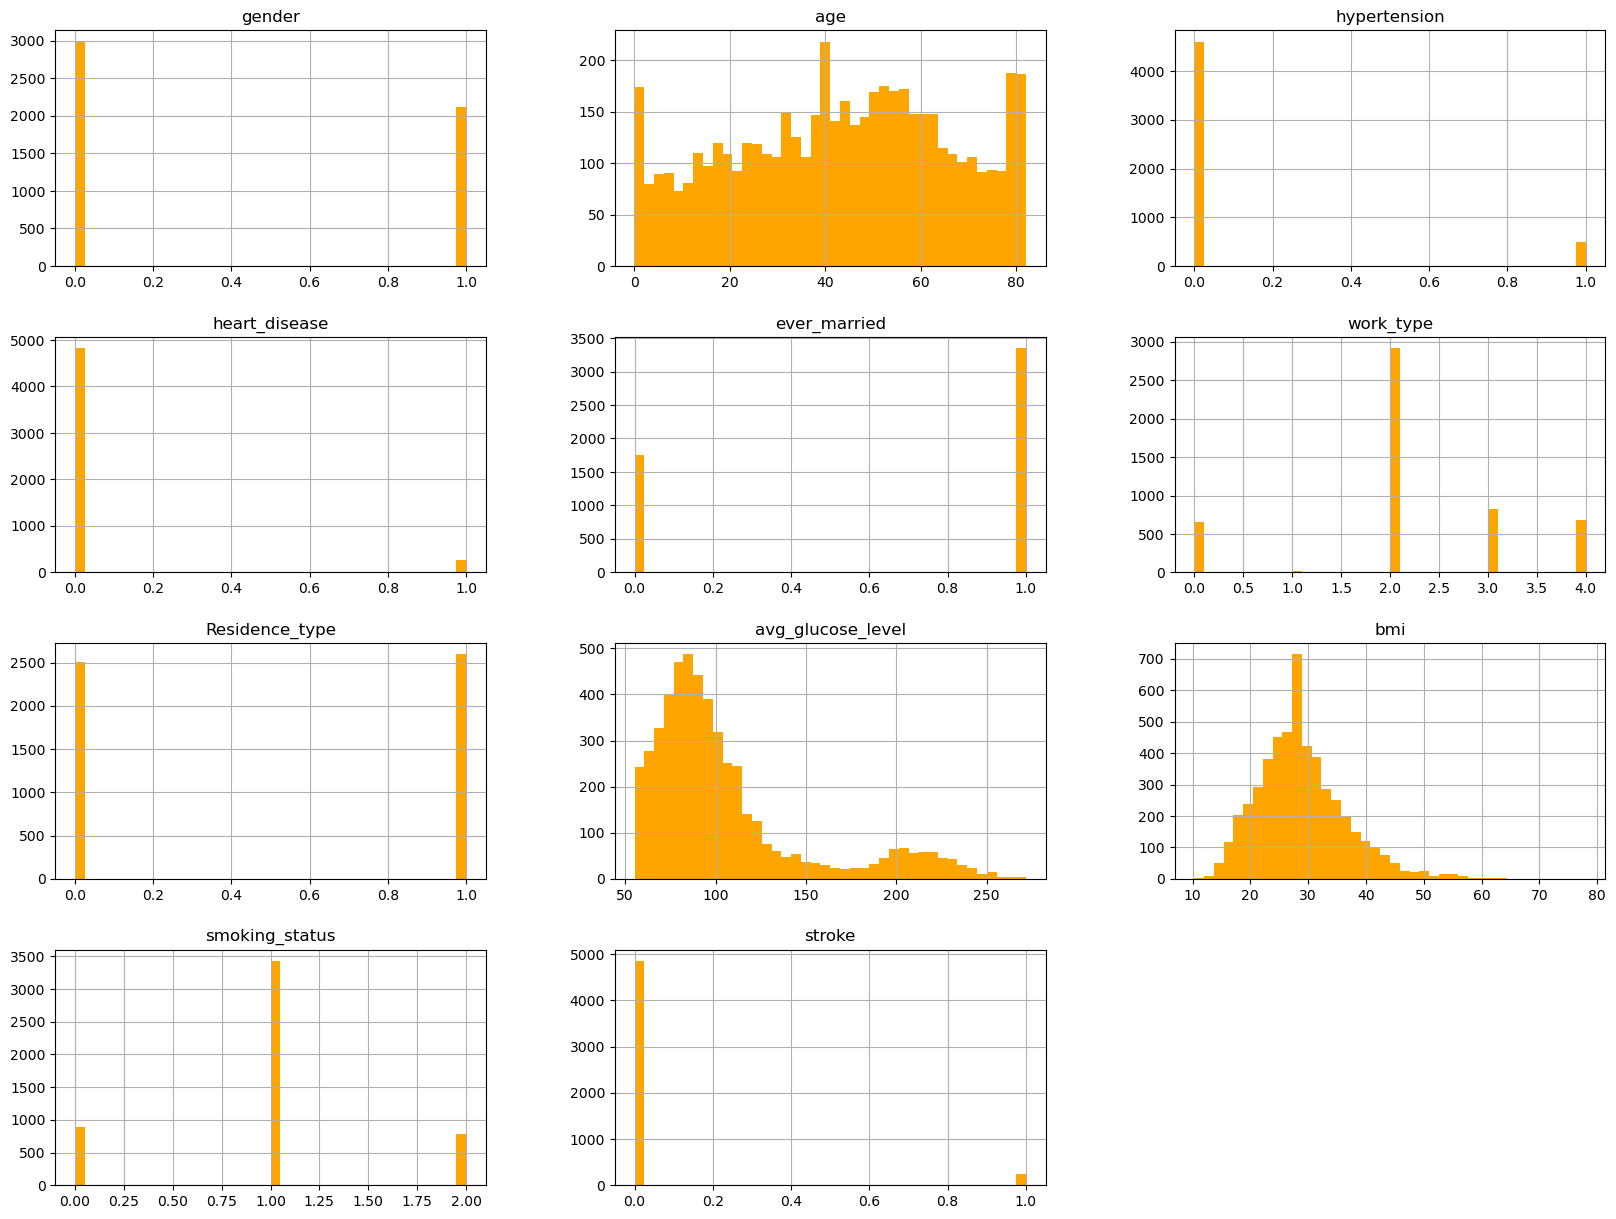

In [30]:
# a hishtogram of each feature
df.hist(bins=40, figsize=(20,15), color="orange")
plt.show()

In [31]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027975,0.019742,0.085755,-0.030504,0.057256,-0.005641,0.054943,-0.030875,-0.021325,0.010685
age,-0.027975,1.000000,0.277681,0.263738,0.678800,-0.361124,0.013868,0.237736,0.331661,-0.110849,0.249013
hypertension,0.019742,0.277681,1.000000,0.108749,0.164805,-0.051496,-0.006786,0.176044,0.150512,-0.019385,0.129461
heart_disease,0.085755,0.263738,0.108749,1.000000,0.114514,-0.027904,0.002949,0.161789,0.038244,-0.016447,0.135822
ever_married,-0.030504,0.678800,0.164805,0.114514,1.000000,-0.352353,0.005854,0.154869,0.341224,-0.047314,0.111156
work_type,0.057256,-0.361124,-0.051496,-0.027904,-0.352353,1.000000,-0.007405,-0.049990,-0.303324,-0.020140,-0.035400
Residence_type,-0.005641,0.013868,-0.006786,0.002949,0.005854,-0.007405,1.000000,-0.005259,0.003083,0.011841,0.015419
avg_glucose_level,0.054943,0.237736,0.176044,0.161789,0.154869,-0.049990,-0.005259,1.000000,0.173113,-0.033634,0.134070
bmi,-0.030875,0.331661,0.150512,0.038244,0.341224,-0.303324,0.003083,0.173113,1.000000,-0.015808,0.037369
smoking_status,-0.021325,-0.110849,-0.019385,-0.016447,-0.047314,-0.020140,0.011841,-0.033634,-0.015808,1.000000,-0.037341


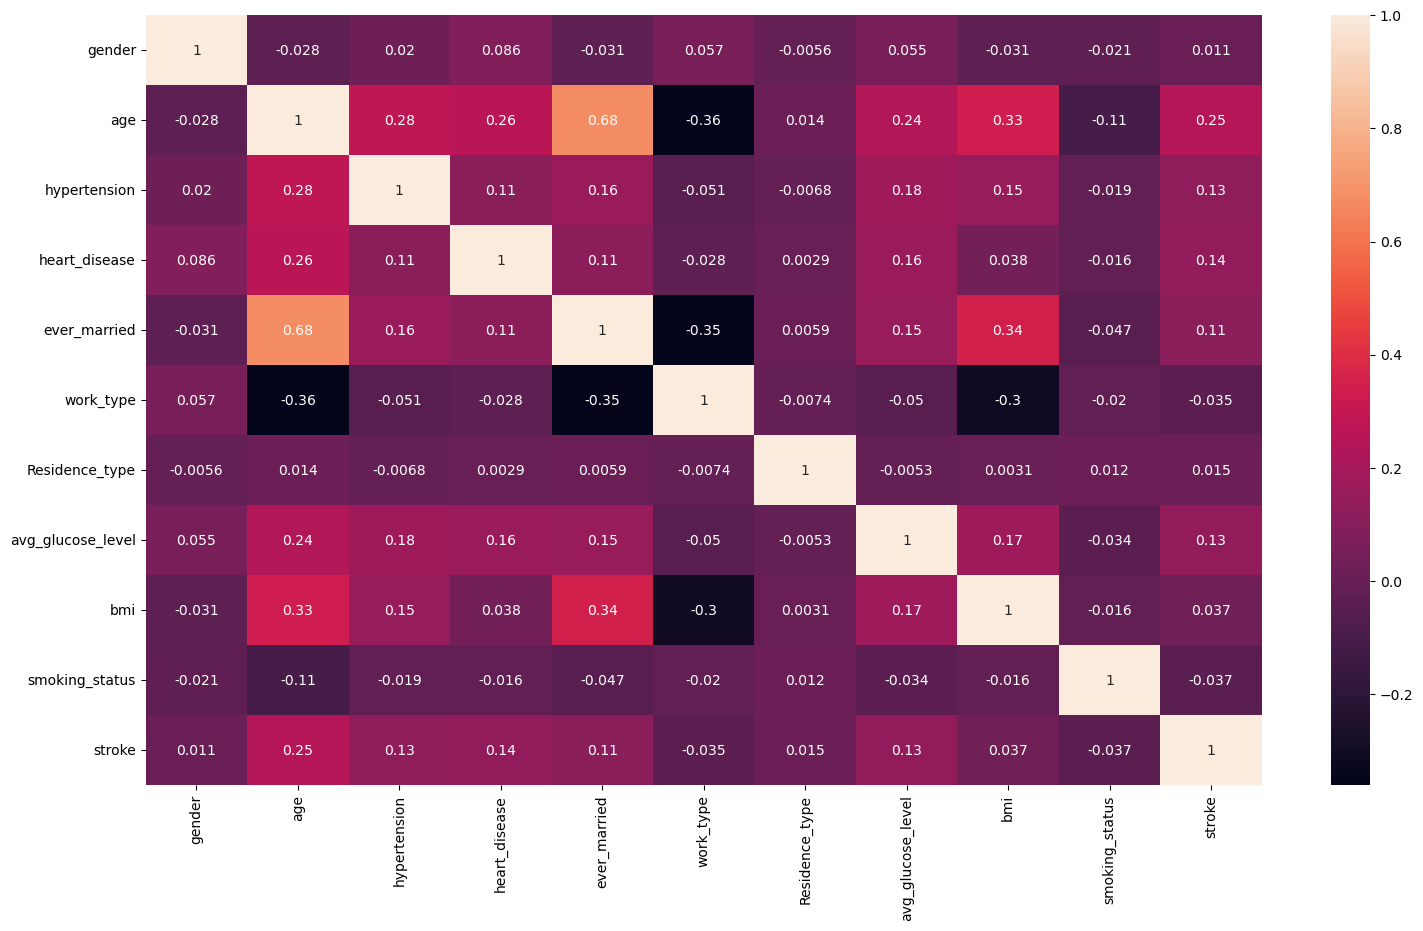

In [32]:
plt.figure(figsize=(18,10))
sns.heatmap(data=df.corr(),cmap="rocket",annot=True)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
X = df.drop(["stroke"],axis=1)
y = df['stroke']
rfc.fit(X, y)

# Print feature importance scores
importances = rfc.feature_importances_
for feature, importance in zip(df.columns.values.tolist(), importances):
    print(f'Feature {feature}: {importance}')

# Select the top k features based on their importance score
k = 7
top_k_features = importances.argsort()[-k:][::-1]

print(f'Top {k} features: {top_k_features}')

Feature gender: 0.03339182531127762
Feature age: 0.23406039496573833
Feature hypertension: 0.024417359475371866
Feature heart_disease: 0.024776516272952638
Feature ever_married: 0.019595886502161698
Feature work_type: 0.04969012435513512
Feature Residence_type: 0.032919886342353086
Feature avg_glucose_level: 0.29759961227416554
Feature bmi: 0.2369872050313694
Feature smoking_status: 0.04656118946947456
Top 7 features: [7 8 1 5 9 0 6]


In [34]:
df.columns.values.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [35]:
df = df.drop(['Residence_type'],axis=1)
df = df.drop(['hypertension'],axis=1)
df = df.drop(['heart_disease'],axis=1)
# df = df.drop(['work_type'],axis=1)
df = df.drop(['ever_married'],axis=1)
df = df.drop(['gender'],axis=1)
#df = df.drop(['smoking_status'],axis=1)
df.shape

(5105, 6)

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
shuffled_df = df.sample(frac=1, random_state=42)
X_sh = shuffled_df.drop(["stroke"],axis=1)
y_sh = shuffled_df['stroke']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_sh, y_sh)
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(len(X_train), "train +", len(X_test), "test")

7772 train + 1944 test


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

{'max_depth': 20, 'max_leaf_nodes': 20, 'n_estimators': 500}
Accuracy score: 81.53%
Accuracy score: 84.56%


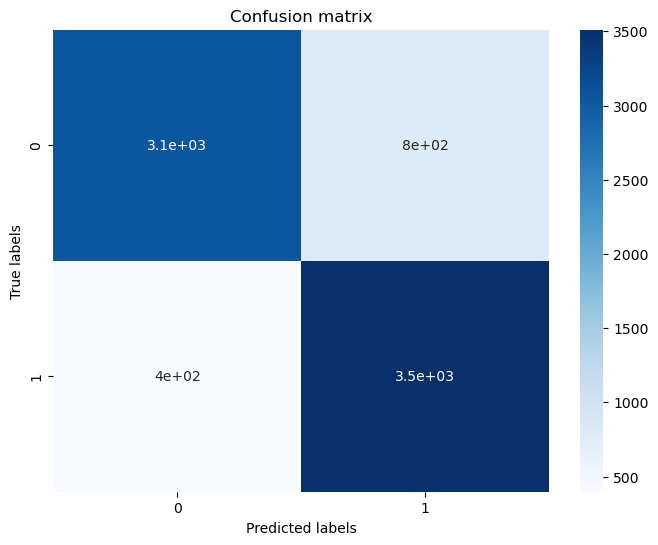

In [38]:
from sklearn.model_selection import GridSearchCV



hyperparams = {'n_estimators': [100, 200, 500],
               'max_depth': [10, 20, 30, None],
               'max_leaf_nodes' : [10,15,20]
              }

# hyperparams = {'n_estimators': [100, 200],
#                'max_depth': [10, 20],
#                'min_samples_split': [2, 5],
#                'min_samples_leaf': [1, 2],
#                'max_leaf_nodes' : [10,15]
#               }


clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, hyperparams, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_hyperparams = grid.best_params_


print(best_hyperparams)

#clf = RandomForestClassifier( n_estimators=150, max_depth=12,max_leaf_nodes=14, random_state=42)

clf = RandomForestClassifier(random_state=42, **best_hyperparams)


# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
# Compute the confusion matrix
conf_mat = confusion_matrix( y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy1 = accuracy_score( y_train, y_pred_train)

# print("Confusion matrix:")
# print(cm)
print("Accuracy score: {:.2f}%".format(accuracy * 100))
print("Accuracy score: {:.2f}%".format(accuracy1 * 100))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

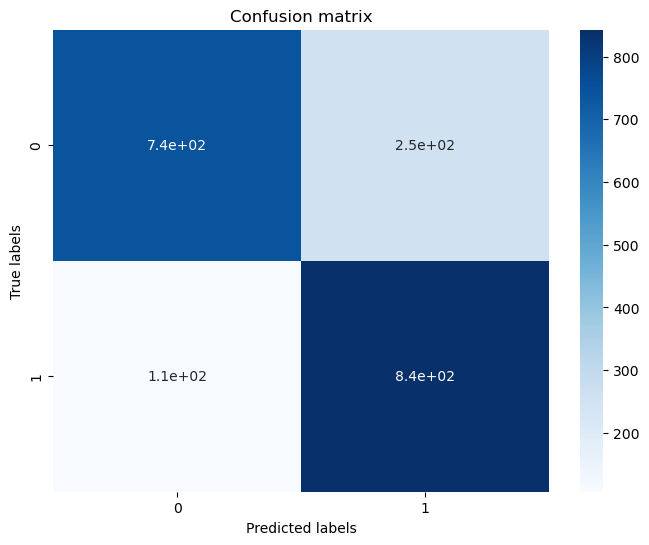

In [39]:
conf_mat1 = confusion_matrix( y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat1, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score
X1 = shuffled_df.drop(["stroke"],axis=1)
y1 = shuffled_df['stroke']
scores = cross_val_score(clf, X_resampled, y_resampled, cv=7)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

Cross-validation scores: [0.80475504 0.82925072 0.82636888 0.85086455 0.84942363 0.84726225
 0.84293948]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       995
           1       0.77      0.89      0.82       949

    accuracy                           0.82      1944
   macro avg       0.82      0.82      0.81      1944
weighted avg       0.82      0.82      0.81      1944

